In [1]:
setwd('/import/liujing/data2/')

In [2]:
load('./data.new.rda')

In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
library(dplyr)

In [5]:
exp = nn %>%  dplyr::filter(Type == 1) %>%  dplyr::select(c('FAM200B','BCL2A1','IGJ','TXN')) %>%  t()

In [6]:
library(ConsensusClusterPlus)

Warning message:
"package 'ConsensusClusterPlus' was built under R version 4.2.2"


In [7]:
library(NMF) 

Loading required package: registry

Warning message:
"package 'registry' was built under R version 4.2.3"
Loading required package: rngtools

Warning message:
"package 'rngtools' was built under R version 4.2.3"
Loading required package: cluster

Warning message:
"package 'cluster' was built under R version 4.2.3"
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')



In [8]:
con <- ConsensusClusterPlus(exp, #矩阵形式
                            maxK=10, #最大聚类簇数量
                            reps=100, #抽取的子样本数量
                            pItem=0.8,#抽样样本的比例 
                            pFeature=1,
                            title="resultstrain", #输出文件夹名字
                            clusterAlg="km", #选择聚类算法
                            distance="euclidean", #指定聚类时使用的距离或相关性类型
                            seed=1234, #中子数
                            plot="png", #输出格式 （pdf可能会比较难打开）
                            writeTable=TRUE)

end fraction

clustered

clustered

clustered

clustered

clustered

clustered

clustered

clustered

clustered



In [9]:
# dim(expr)

# expr1 = log2(expr+1)

# nmfinput = as.data.frame(expr1)

# library(NMF)

# ranks <- 1:10
# estim.coad <- nmf(nmfinput,ranks, nrun=20)
# duplicated(colnames(nmfinput))



# plot(estim.coad)

# seed = 2020820
# nmf.rank4 <- nmf(nmfinput, 
#                  rank = 2, 
#                  nrun=50,
#                  seed = seed, 
#                  method = "brunet")

# jco <- c("#EABF00","#C6524A","#868686")
# index <- extractFeatures(nmf.rank4,"max") 
# sig.order <- unlist(index)
# NMF.Exp.rank4 <- nmfinput[sig.order,]
# NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
# group <- predict(nmf.rank4) # 提出亚型
# table(group)
# consensusmap(nmf.rank4,
#              labRow = NA,
#              labCol = NA,
#              annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
#              annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

# library(tinyarray)

# dim(nmfinput)

In [10]:
load('cohort1.rda')

In [12]:
expr

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZZ3,9.69410395,8.20416477,9.5694410,6.65988172,5.44959396,8.61169076,6.88601794,5.38910283,5.33668621,7.70850963,...,14.88093327,8.03779888,5.66744056,11.80002873,6.65917587,5.78523205,8.74997730,11.03076169,8.00470383,10.07246756
ZZEF1,18.51592726,18.29619492,19.0530299,18.40330246,19.99257064,18.64997155,19.68056442,20.43801876,19.53963886,20.41526421,...,8.75129191,17.11511965,16.58556627,16.60636629,18.34410168,21.66590384,21.33376084,20.21582497,17.91822285,13.92859001
ZYX,79.97591557,76.78213416,74.7668683,96.50044584,175.82318970,75.13317477,88.99309334,116.67095950,163.20362160,115.85069940,...,17.34833811,80.12329957,114.48004880,53.14807465,134.49743550,106.66460800,103.85102540,78.69773028,98.00160843,60.46376645
ZYG11B,7.40926072,9.11131459,7.3429436,6.93451455,4.65253009,7.84270576,6.63249225,8.72100235,5.72186225,5.75849945,...,10.26760295,9.19477224,9.64853998,8.80584482,7.25968377,8.53267347,6.44952504,8.45257370,7.14218156,8.76249314
ZYG11A,0.03306296,0.01076892,0.0410373,0.19614840,0.00000000,0.05296868,0.02320383,0.01198370,0.00893660,0.01978994,...,0.14582395,0.11693586,0.06262616,0.09756014,0.05730611,0.00000000,0.02498751,0.07171723,0.04395248,0.04114853
ZXDC,16.78476521,14.36021390,16.8750113,14.93882857,17.19170109,17.53996860,16.15201813,17.01995690,15.90812061,17.29845877,...,8.97839044,16.89550090,15.34367361,17.09011525,18.78613086,18.66821868,18.13496327,20.95710508,17.92653881,13.03514789
ZXDB,1.97277246,1.50625877,1.7681015,1.42678083,1.39844390,1.99331334,2.32790243,1.69612518,1.71870894,1.90302508,...,3.49047641,1.64621280,0.99935641,2.18405362,1.75576645,1.48003493,2.43403501,2.71677013,2.15900379,2.27821150
ZXDA,1.70983722,1.24333472,1.5176390,1.39678068,1.12728457,1.67221828,1.79996459,1.07011871,1.10432958,1.23168429,...,2.44432112,1.10270325,0.96030793,1.70131591,1.43698259,1.04880793,1.44247640,1.17518037,1.36775488,2.46820839
ZWINT,0.73965751,0.27634199,0.6480374,0.30567059,0.33550416,1.73563519,0.38932283,0.66233886,0.51156589,3.08604916,...,0.74360196,0.46164584,0.20603252,0.51353777,0.31673071,0.41931622,1.03579420,0.84938770,1.51828277,0.24367270


In [11]:
group1 = read.csv('./resultstrain/resultstrain.k=2.consensusClass.csv',header =F)

### group1 和group2的差异分析

In [209]:
n=expr[,group1$V1]

In [210]:
group = paste0('subtype',group1$V2)

In [211]:
expMatrix <- n
fpkmToTpm <- function(fpkm)
{
  exp(log(fpkm) - log(sum(fpkm)) + log(1e6))
}
tpms <- apply(expMatrix,2,fpkmToTpm)
tpms[1:6,]
#colSums(tpms)

,CI10,CI11,CI12,CI13,CI14,CI15,CI16,CI17,CI18,CI19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
ZZZ3,72.7262,22.51254,30.6214,22.87,43.8992,79.6019,30.17,45.2547,28.44947,35.01914,...,89.3363,44.8050,29.7890,69.542,36.838,31.63,47.3813,62.1230,43.7436,56.0147
ZZEF1,79.2242,94.03398,109.3557,91.80,86.9303,105.7008,89.76,93.6570,79.78097,79.28993,...,52.5375,95.4045,87.1763,97.867,101.479,118.45,115.5228,113.8514,97.9183,77.4592
ZYX,207.6577,565.56309,1034.9668,855.93,402.7591,301.8575,771.59,639.4520,832.01872,629.19740,...,104.1491,446.6300,601.7250,313.220,744.036,583.16,562.3559,443.2097,535.5527,336.2492
ZYG11B,52.6898,51.34312,40.9117,55.95,41.8192,40.1766,25.36,37.3804,32.86038,36.85960,...,61.6406,51.2543,50.7142,51.896,40.160,46.65,34.9243,47.6032,39.0301,48.7297
ZYG11A,0.3202,0.04732,0.5518,0.00,0.1664,0.8785,0.00,0.3576,0.04508,0.05049,...,0.8754,0.6518,0.3292,0.575,0.317,0.00,0.1353,0.4039,0.2402,0.2288
ZXDC,78.3808,78.25576,95.7572,91.76,96.8150,109.0492,94.49,98.0426,81.83516,74.44833,...,53.9009,94.1803,80.6487,100.718,103.924,102.06,98.2013,118.0262,97.9638,72.4906


In [212]:
group_list <- factor(group,levels = c("subtype1","subtype2"),ordered = F)

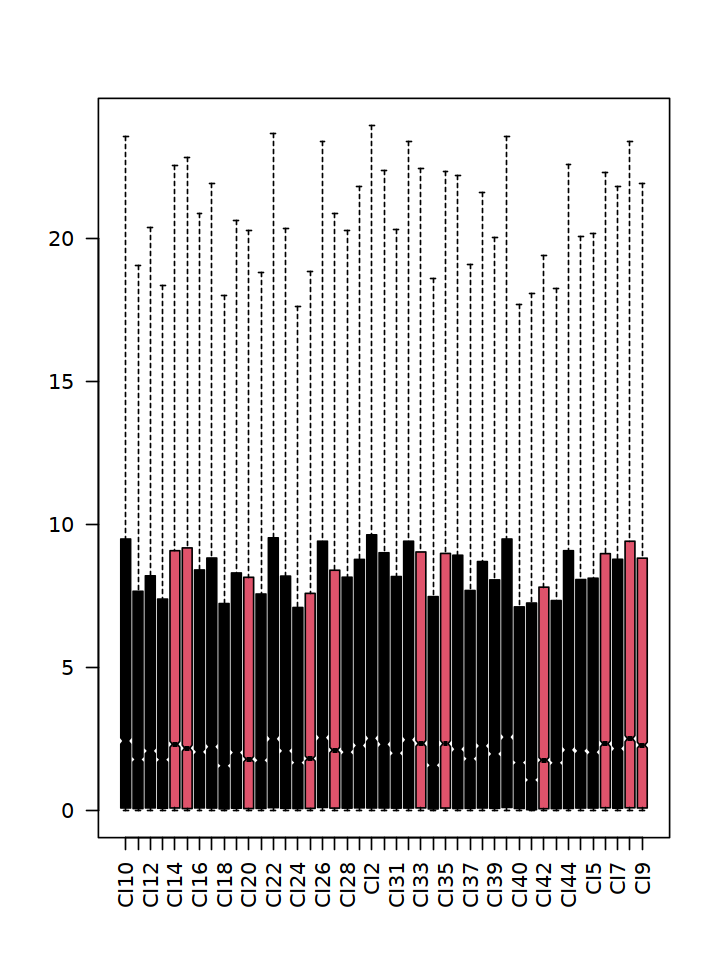

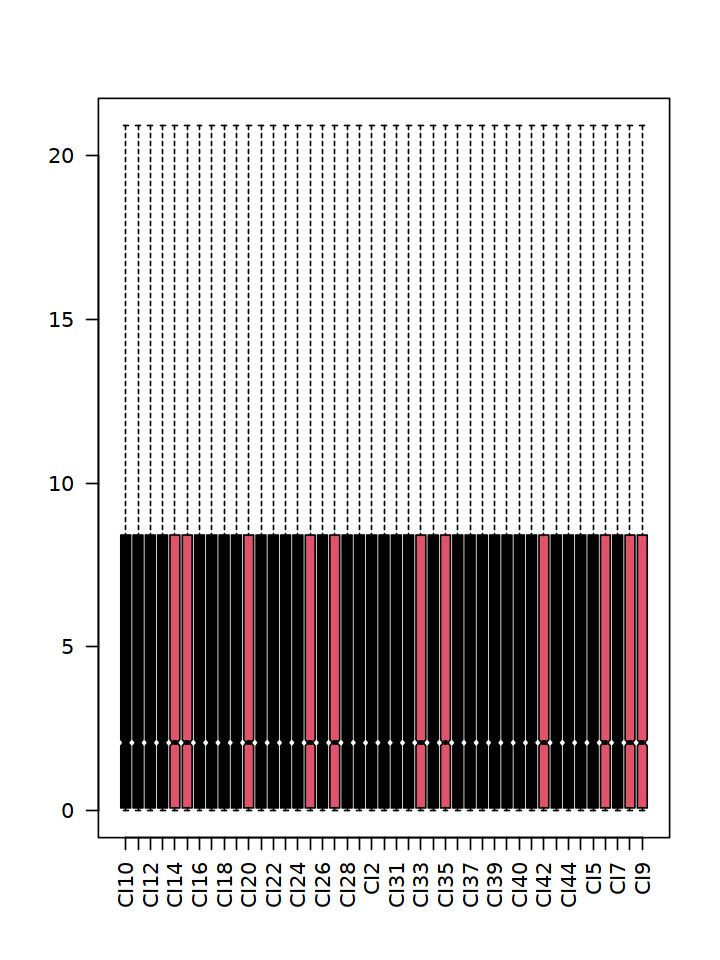

In [213]:
exprSet <- n
boxplot(exprSet,outline=FALSE, notch=T,col=group_list, las=2)
library(limma) 
exprSet=normalizeBetweenArrays(exprSet)
boxplot(exprSet,outline=FALSE, notch=T,col=group_list, las=2)
#判断数据是否需要转换
exprSet <- log2(exprSet+1)

In [214]:
dat <- exprSet
design=model.matrix(~factor( group ))
fit=lmFit(dat,design)
fit=eBayes(fit)
options(digits = 4)
topTable(fit,coef=2,adjust='BH')
bp=function(g){
  library(ggpubr)
  df=data.frame(gene=g,stage=group)
  p <- ggboxplot(df, x = "stage", y = "gene",
                 color = "stage", palette = "jco",
                 add = "jitter")
  #  Add p-value
  p + stat_compare_means()
}
deg=topTable(fit,coef=2,adjust='BH',number = Inf)
head(deg) 

Warning message:
"Zero sample variances detected, have been offset away from zero"


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IGJ,1.84768,5.66779,7.249,6.650e-09,0.0001211,10.157
GPRC5D,0.63194,0.60376,6.127,2.668e-07,0.0024298,6.749
EYA2,0.13237,0.07963,5.254,4.719e-06,0.0286499,4.086
AGPAT4,0.38074,2.42478,5.039,9.518e-06,0.0303220,3.436
GLDC,0.27834,0.25838,5.034,9.653e-06,0.0303220,3.422
TNFRSF17,0.61372,0.62944,4.979,1.153e-05,0.0303220,3.258
HRASLS2,0.65708,0.43470,4.976,1.165e-05,0.0303220,3.248
GALNT18,0.08373,0.05523,4.390,7.570e-05,0.1723208,1.517
C1orf21,0.52184,2.36172,4.328,9.191e-05,0.1859827,1.338


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IGJ,1.8477,5.66779,7.249,6.650e-09,0.0001211,10.157
GPRC5D,0.6319,0.60376,6.127,2.668e-07,0.0024298,6.749
EYA2,0.1324,0.07963,5.254,4.719e-06,0.0286499,4.086
AGPAT4,0.3807,2.42478,5.039,9.518e-06,0.0303220,3.436
GLDC,0.2783,0.25838,5.034,9.653e-06,0.0303220,3.422
TNFRSF17,0.6137,0.62944,4.979,1.153e-05,0.0303220,3.258


In [215]:
padj = 0.05
foldChange = 0.5

deg$group = as.factor(ifelse(deg$P.Value < padj & abs(deg$logFC	) > foldChange, 
                                 ifelse(deg$logFC	> foldChange ,'Up','Down'),'NoSignifi'))
table(deg$group)


     Down NoSignifi        Up 
        8     18180        24 

In [194]:
cg = deg %>% dplyr::filter(group != 'NoSignifi') %>%  rownames()

In [195]:
n=expr[cg,group1$V1]

In [196]:
group3 = group1$V2

In [189]:
names(group3) = group1$V1

In [190]:
group4 = as.factor(group3)

In [191]:
library(tinyarray)

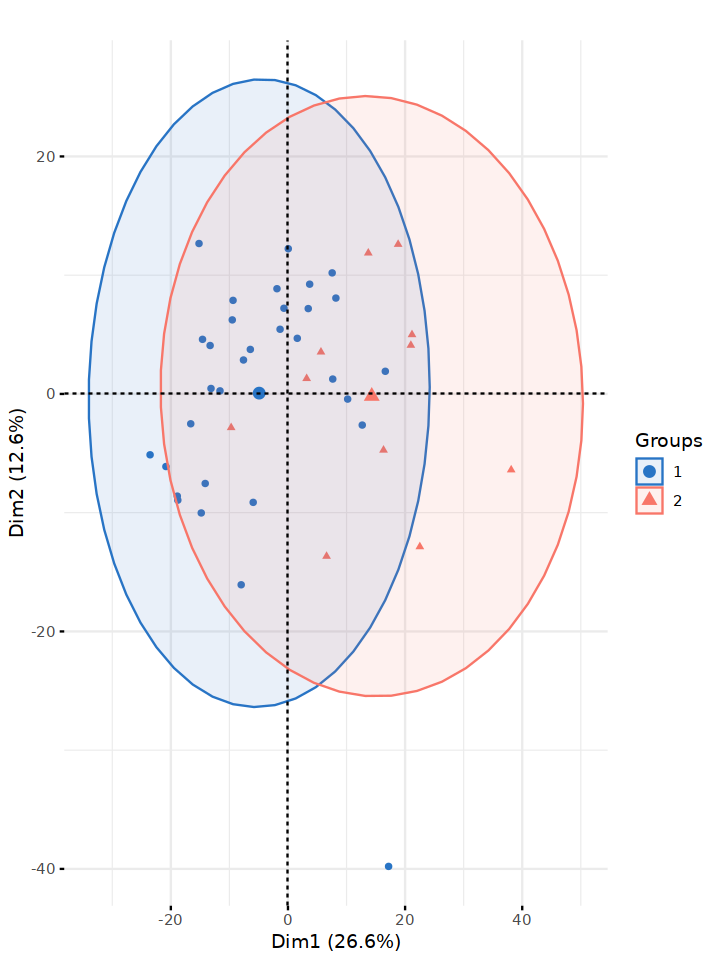

In [192]:
draw_pca(n,group4)

### 差异基因表达热图  这里是subtype2 与subtype1比

In [112]:
data1 = n

In [113]:
library(pheatmap)
forplot = na.omit(data1)
#forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

[1] 194  43

In [115]:
library(pheatmap)
annotation_col = data.frame(group)
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

,CI10,CI11,CI12,CI13,CI14,CI15,CI16,CI17,CI18,CI19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
TNFRSF17,0.6777,0.4001,-0.8120,-0.7525,1.22493,0.0482,-0.21105,-1.068,-0.8098,-0.7417,...,1.6650,1.527,-1.0823,-0.5464,-1.0426,-1.0534,1.172,-0.0907,0.7743,1.1212
GPRC5D,-0.9778,-0.7311,-0.2831,-1.1250,-0.02485,0.2490,-0.06289,-1.146,-0.2614,-0.1549,...,-0.8042,2.000,-0.6393,-0.4903,-0.3205,-0.5885,1.605,-1.1153,1.8784,-0.2053


In [130]:
options(repr.plot.width = 6,repr.plot.height = 5)

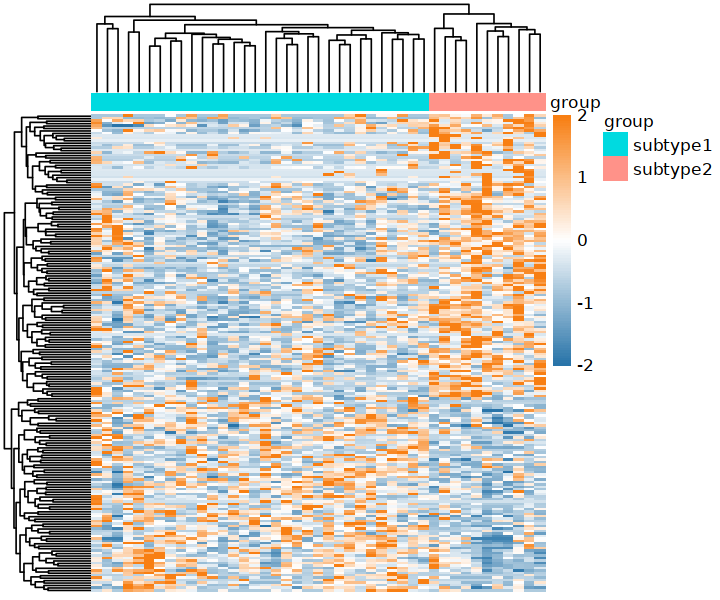

In [131]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [133]:
table(deg$group)


     Down NoSignifi        Up 
       79     18018       115 

In [139]:
deg$symbol=rownames(deg)
  library(ggplot2)
  library(clusterProfiler)
  library(org.Hs.eg.db)
  df <- bitr(unique(deg$symbol), fromType = "SYMBOL",
             toType = c( "ENTREZID"),
             OrgDb = org.Hs.eg.db)
  head(df)
  DEG=deg
  head(DEG)

  DEG=merge(DEG,df,by.y='SYMBOL',by.x='symbol')
  head(DEG)

  save(DEG,file = 'anno_DEG.Rdata')
  gene_up= DEG[DEG$group == 'Up','ENTREZID'] 
  gene_down=DEG[DEG$group == 'Down','ENTREZID'] 
gene_all= DEG[DEG$group == 'NoSignifi','ENTREZID'] 

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(unique(deg$symbol), fromType = "SYMBOL", toType = c("ENTREZID"), :
"9.89% of input gene IDs are fail to map..."


,SYMBOL,ENTREZID
,<chr>,<chr>
2,AGPAT4,56895
3,TNFRSF17,608
4,GPRC5D,55507
5,EYA2,2139
6,GALNT18,374378
8,ACTRT3,84517


,logFC,AveExpr,t,P.Value,adj.P.Val,B,group,symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
IGJ,0.4531,7.326,6.228,1.872e-07,0.003408,5.6084,NoSignifi,IGJ
AGPAT4,0.2168,6.124,4.848,1.746e-05,0.109052,2.2096,NoSignifi,AGPAT4
TNFRSF17,1.3646,3.923,4.839,1.796e-05,0.109052,2.1880,Up,TNFRSF17
GPRC5D,1.3584,3.876,4.748,2.410e-05,0.109731,1.9637,Up,GPRC5D
EYA2,1.4523,1.295,4.645,3.351e-05,0.122062,1.7117,Up,EYA2
GALNT18,1.1526,1.059,4.340,8.798e-05,0.267052,0.9715,Up,GALNT18


,symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B,group,ENTREZID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,A1BG,-0.051688,3.151524,-0.3914,0.6975,0.9664,-5.450,NoSignifi,1
2,A1CF,-0.003904,0.002905,-0.4183,0.6779,0.9625,-5.441,NoSignifi,29974
3,A2M,0.252645,2.293581,1.2078,0.2339,0.9410,-4.900,NoSignifi,2
4,A2ML1,0.132478,0.093929,1.5027,0.1404,0.9410,-4.573,NoSignifi,144568
5,A3GALT2,-0.136882,4.686431,-0.4212,0.6757,0.9623,-5.440,NoSignifi,127550
6,A4GALT,-0.483687,1.216120,-0.9491,0.3480,0.9410,-5.133,NoSignifi,53947


In [140]:
gene_up
enrichKK <- enrichKEGG(gene         =  gene_all,
                     organism     = 'hsa',
                     #universe     = gene_all,
                     pvalueCutoff = 0.5,
                     qvalueCutoff =0.5)
head(enrichKK)[,1:6] 
enrichKK=DOSE::setReadable(enrichKK, OrgDb='org.Hs.eg.db',keyType='ENTREZID')
enrichKK 

[1] "84517"  "9510"   "158067" "8644"   "50636"  "23237"  "387715" "220202"
  [9] "353500" "10917"  "149466" "160857" "151278" "120935" "55231"  "991"   
 [17] "1101"   "53842"  "1305"   "1306"   "23127"  "80319"  "4921"   "65989" 
 [25] "10655"  "1769"   "79075"  "133121" "54869"  "285141" "2139"   "642273"
 [33] "25854"  "79633"  "8324"   "128954" "374378" "2619"   "9945"   "2731"  
 [41] "2765"   "55507"  "84842"  "3306"   "23553"  "3479"   "286676" "3706"  
 [49] "3802"   "3821"   "3938"   "136332" "92312"  "55586"  "83881"  "4337"  
 [57] "653149" "4837"   "4884"   "59277"  "9891"   "83540"  "441161" "127068"
 [65] "390191" "55872"  "56105"  "26025"  "56112"  "56097"  "23612"  "84647" 
 [73] "79949"  "5367"   "127435" "59336"  "5793"   "5915"   "26150"  "6094"  
 [81] "6241"   "154661" "6289"   "148418" "462"    "6444"   "152573" "89886" 
 [89] "6572"   "6505"   "6512"   "415117" "27233"  "50839"  "56158"  "116211"
 [97] "253582" "55321"  "23495"  "608"    "8626"   "7177"   "162514" "7253"  
[105] "254173"

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
hsa05166,hsa05166,Human T-cell leukemia virus 1 infection,217/7344,223/8842,9.212e-12,3.141e-09
hsa05132,hsa05132,Salmonella infection,241/7344,251/8842,1.334e-10,2.274e-08
hsa05165,hsa05165,Human papillomavirus infection,313/7344,333/8842,1.184e-09,1.346e-07
hsa05205,hsa05205,Proteoglycans in cancer,196/7344,204/8842,6.446e-09,4.549e-07
hsa04062,hsa04062,Chemokine signaling pathway,186/7344,193/8842,6.670e-09,4.549e-07
hsa04926,hsa04926,Relaxin signaling pathway,128/7344,130/8842,1.059e-08,5.816e-07


#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:16236] "1" "29974" "2" "144568" "127550" "53947" "51146" "8086" ...
#...pvalues adjusted by 'BH' with cutoff <0.5 
#...272 enriched terms found
'data.frame':	272 obs. of  9 variables:
 $ ID         : chr  "hsa05166" "hsa05132" "hsa05165" "hsa05205" ...
 $ Description: chr  "Human T-cell leukemia virus 1 infection" "Salmonella infection" "Human papillomavirus infection" "Proteoglycans in cancer" ...
 $ GeneRatio  : chr  "217/7344" "241/7344" "313/7344" "196/7344" ...
 $ BgRatio    : chr  "223/8842" "251/8842" "333/8842" "204/8842" ...
 $ pvalue     : num  9.21e-12 1.33e-10 1.18e-09 6.45e-09 6.67e-09 ...
 $ p.adjust   : num  3.14e-09 2.27e-08 1.35e-07 4.55e-07 4.55e-07 ...
 $ qvalue     : num  1.52e-09 1.10e-08 6.52e-08 2.20e-07 2.20e-07 ...
 $ geneID     : chr  "ADCY1/ADCY2/ADCY3/ADCY4/ADCY5/ADCY6/ADCY7/ADCY8/ADCY9/AKT1/AKT2/AKT3/ANAPC1/ANAPC10/ANAPC11/ANAPC13/ANAPC15/AN

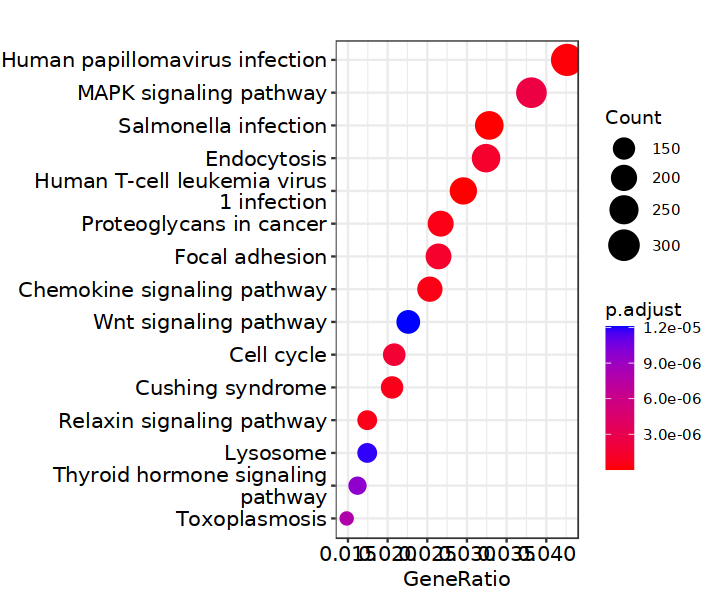

In [141]:
dotplot(enrichKK,showCategory=15)

In [158]:
ego_bp_up<-enrichGO(gene       = gene_all,
                 OrgDb      = org.Hs.eg.db,
                 keyType    = 'ENTREZID',
                 ont        = "BP",
                 pAdjustMethod = "BH",
                 pvalueCutoff = 0.01,#0.01
                 qvalueCutoff = 0.05)

In [159]:
options(repr.plot.width = 6,repr.plot.height =8)

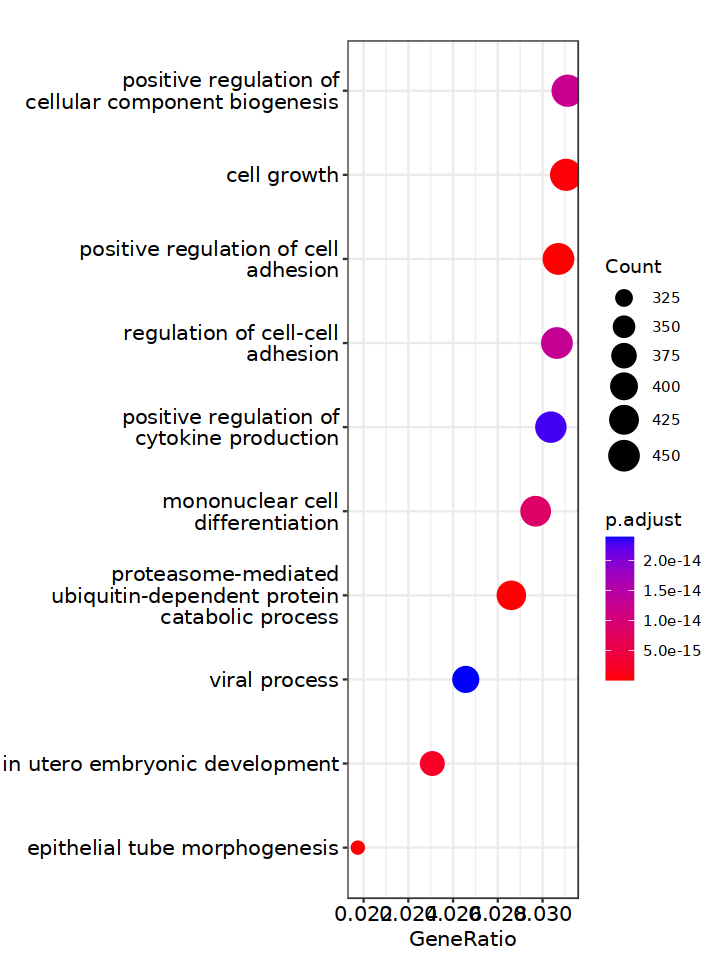

In [160]:
dotplot(ego_bp_up,showCategory = 10)